In [1]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,\
    Embedding, Lambda
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

2024-01-07 17:41:58.656415: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-07 17:41:58.656483: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-07 17:41:58.658191: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-07 17:42:00.147839: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import pickle
from manejo_dataset_heartAttack import Data_set, Test_set, Validation_set

In [3]:
with open("./dataset.pkl", "rb") as pickle_file:
    dataset:Data_set = pickle.load(pickle_file)

In [4]:
print(dataset.validation_set[0].X_train)

[['el mejor juego de la franquicia es cierto aun tiene muchas cosas por pulir mayormente derivadas del poco tiempo de desarrollo que permite pokemon company sin embargo es el camino por el que deben de seguir'
  'Feb 20, 2022' '0 of 1 users found this helpful' '7 Reviews'
  '7 Ratings' 7.4]
 ['game paper get excited pokemon game year year repeat game different skin come new game try different problem new idea feels cut short never truly flesh visual bore flat people seem confuse graphic thing like ultra realism RT speak game simple graphic still manage set apart look visually interesting game need voice act kind lack voice acting feel low budget boring even grunt would bring point book point game play fun would enjoy open movement play big part battle think point start move away turn base battle final fantasy great solution remake could toggle enjoy force onto player combat could much real time heck even getting rid one pokemon limit battling would improvement feel like pick time perio

In [5]:
# Define the corpus

corpus = dataset.validation_set[0].X_train.astype(str).tolist()
 
# Convert the corpus to a sequence of integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
print("After converting our words in the corpus \
into vector of integers:")
print(sequences)

After converting our words in the corpus into vector of integers:
[[211, 34, 12, 39, 25, 56], [212, 6, 213, 2, 3, 1], [214, 27, 16, 2, 3, 1], [215, 27, 18, 2, 3, 1], [216, 6, 217, 8, 7, 1], [218, 4, 219, 2, 3, 1], [220, 4, 40, 2, 3, 1], [221, 4, 127, 10, 17, 97], [222, 11, 128, 8, 7, 1], [223, 5, 224, 2, 3, 1], [225, 5, 98, 2, 3, 1], [226, 6, 40, 2, 3, 1], [227, 30, 31, 72, 228, 49], [229, 4, 41, 15, 17, 32], [230, 4, 41, 8, 7, 1], [231, 11, 73, 2, 3, 1], [232, 22, 99, 2, 3, 1], [233, 4, 33, 129, 130, 100], [234, 4, 26, 2, 3, 1], [235, 6, 236, 72, 237, 74], [238, 29, 131, 2, 3, 1], [239, 13, 75, 8, 7, 1], [240, 6, 241, 2, 3, 1], [242, 9, 243, 2, 3, 1], [244, 4, 245, 10, 24, 246], [247, 5, 132, 2, 3, 1], [248, 9, 28, 2, 3, 1], [249, 4, 250, 8, 7, 1], [251, 6, 133, 8, 7, 1], [252, 9, 18, 2, 3, 1], [253, 9, 101, 8, 7, 1], [254, 4, 26, 2, 3, 1], [255, 13, 31, 2, 3, 1], [256, 4, 102, 15, 24, 32], [257, 9, 18, 2, 3, 1], [258, 6, 259, 2, 3, 1], [260, 5, 134, 8, 7, 1], [261, 29, 18, 262, 76, 1

In [6]:
# Define the parameters
vocab_size = len(tokenizer.word_index) + 1
embedding_size = 10
window_size = 2
 
# Generate the context-target pairs
contexts = []
targets = []
for sequence in sequences:
    for i in range(window_size, len(sequence) - window_size):
        context = sequence[i - window_size:i] +\
            sequence[i + 1:i + window_size + 1]
        target = sequence[i]
        contexts.append(context)
        targets.append(target)
 
# Convert the contexts and targets to numpy arrays
X = np.array(contexts)
 
# Define the CBOW model
model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_size,
                    input_length=2*window_size))
model.add(Lambda(lambda x: tf.reduce_mean(x, axis=1)))
model.add(Dense(units=vocab_size, activation='softmax'))
model.save_weights('cbow_weights.h5')
 
 
# Load the pre-trained weights
model.load_weights('cbow_weights.h5')

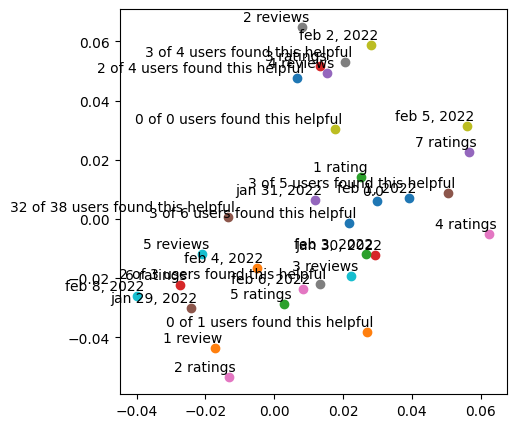

In [7]:
# Get the word embeddings
embeddings = model.get_weights()[0]
 
# Perform PCA to reduce the dimensionality
# of the embeddings
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)
 
# Visualize the embeddings
plt.figure(figsize=(5, 5))
for i, word in enumerate(tokenizer.word_index.keys()):

    if i >30: break

    x, y = reduced_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points',
                 ha='right', va='bottom')
plt.show()